In [14]:
import pandas as pd

# File names
excel_file = 'EDGAR_Database.xlsx'
csv_file = 'EDGAR_Database.csv'

# Read the Excel file
df = pd.read_excel(excel_file)

# Save it as a CSV file
df.to_csv(csv_file, index=False)

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Display the DataFrame
print(df.head())


  Company  Fiscal year  Total Revenue  Net Income  Total Assets  \
0    TSLA         2024          97690        7153        122070   
1    TSLA         2023          96773       14974        106618   
2    TSLA         2022          81462       12587         82338   
3    MSFT         2024         245122       88136        512163   
4    MSFT         2023         211915       72361        411976   

   Total Liabilities  Cash Flow from Operating Activities  
0              48390                                14923  
1              43009                                13256  
2              36440                                14724  
3             243686                               118548  
4             205753                                87582  


In [17]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

print(df)

  Company  Fiscal year  Total Revenue  Net Income  Total Assets  \
0    TSLA         2024          97690        7153        122070   
1    TSLA         2023          96773       14974        106618   
2    TSLA         2022          81462       12587         82338   
3    MSFT         2024         245122       88136        512163   
4    MSFT         2023         211915       72361        411976   
5    MSFT         2022         198270       72738        364840   
6    AAPL         2024         391035       93736        364980   
7    AAPL         2023         383285       96995        352583   
8    AAPL         2022         394328       99803        352755   

   Total Liabilities  Cash Flow from Operating Activities  Revenue Growth (%)  \
0              48390                                14923                 NaN   
1              43009                                13256           -0.938684   
2              36440                                14724          -15.821562   
3    

In [19]:
# Aggregate total revenue and net income by company
company_agg = df.groupby('Company')[['Total Revenue', 'Net Income']].agg(['sum', 'mean', 'min', 'max'])
print("Aggregate by Company:\n", company_agg)

# Aggregate by fiscal year across all companies
year_agg = df.groupby('Fiscal year')[['Total Revenue', 'Net Income']].agg(['sum', 'mean'])
print("\nAggregate by Fiscal Year:\n", year_agg)

# Calculate average revenue growth and net income growth by company
growth_agg = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)']].mean()
print("\nAverage Growth by Company:\n", growth_agg)

Aggregate by Company:
         Total Revenue                                Net Income                \
                  sum           mean     min     max        sum          mean   
Company                                                                         
AAPL          1168648  389549.333333  383285  394328     290534  96844.666667   
MSFT           655307  218435.666667  198270  245122     233235  77745.000000   
TSLA           275925   91975.000000   81462   97690      34714  11571.333333   

                       
           min    max  
Company                
AAPL     93736  99803  
MSFT     72361  88136  
TSLA      7153  14974  

Aggregate by Fiscal Year:
             Total Revenue                Net Income              
                      sum           mean        sum          mean
Fiscal year                                                      
2022               674060  224686.666667     185128  61709.333333
2023               691973  230657.666667     184330  6

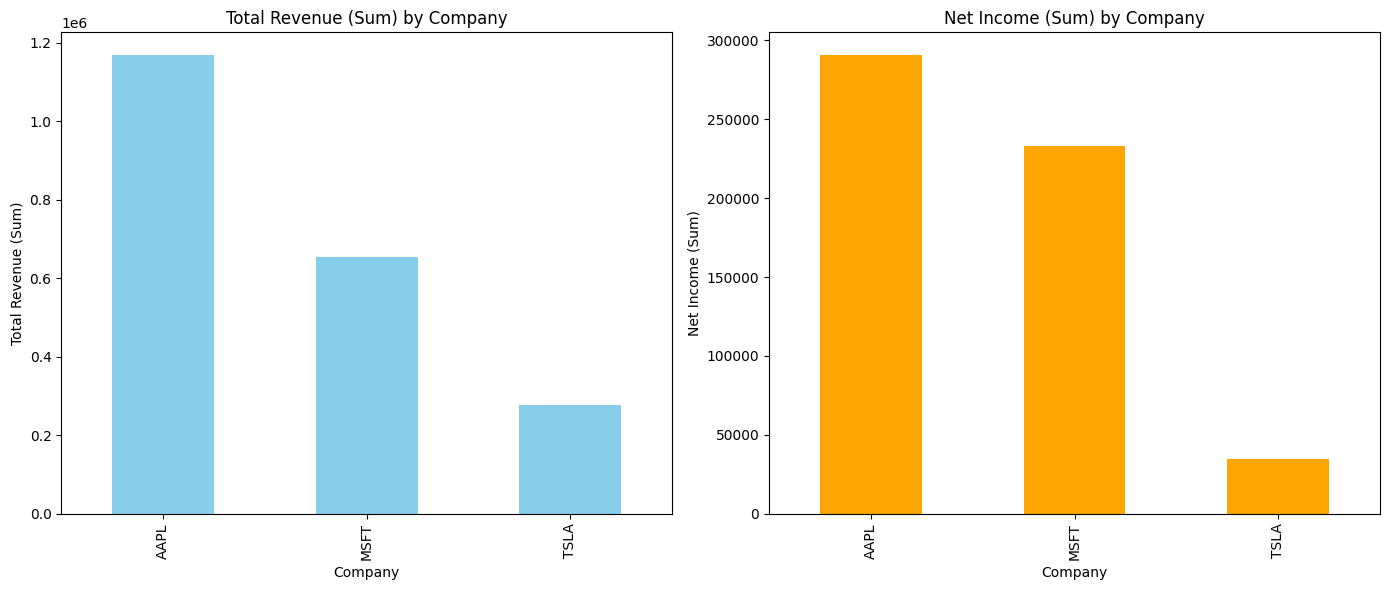

In [21]:
import matplotlib.pyplot as plt

# Plot Total Revenue and Net Income (sum) for each company
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Total Revenue
company_agg[('Total Revenue', 'sum')].plot(kind='bar', ax=ax[0], color='skyblue', title='Total Revenue (Sum) by Company')
ax[0].set_ylabel('Total Revenue (Sum)')
ax[0].set_xlabel('Company')

# Net Income
company_agg[('Net Income', 'sum')].plot(kind='bar', ax=ax[1], color='orange', title='Net Income (Sum) by Company')
ax[1].set_ylabel('Net Income (Sum)')
ax[1].set_xlabel('Company')

plt.tight_layout()
plt.show()

Final Analysis Summary

I. Company-Level Financial Overview.
------------------------------------
An in-depth analysis of Total Revenue and Net Income for the companies: AAPL (Apple), MSFT (Microsoft), and TSLA (Tesla). The results from the statistical aggregation reveal:
1. Apple leads in both revenue and profitability, maintaining strong consistency across fiscal years.
2. Microsoft follows with steady growth and high net income.
3. Tesla, although growing, has significantly lower net income and higher volatility in profit margins.

II. Yearly Performance Trends (Across All Companies).
----------------------------------------------------
1. There is a positive upward trend in both total revenue and net income year-over-year.
2. This indicates a strong recovery or expansion period for the industry or market at large.

III. Growth Rate Analysis by Company.
-------------------------------------
1. Microsoft shows the strongest and most consistent growth in both revenue and income.
2. Tesla demonstrates good revenue growth, but net income growth is negative, signaling increased costs or efficiency issues.
3. Apple appears to be relatively stable but slightly contracting in growth terms.

Conclusion
1. Microsoft (MSFT) emerges as the most financially balanced performer, with growth in both top-line and bottom-line metrics.
2. Apple (AAPL) remains dominant in size but shows signs of plateauing in growth.
3. Tesla (TSLA) is in a high-growth phase for revenue, but needs to manage profitability better.

